## EDA on COVID-19 Dataset

Importing all the necessary libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go

Reading the Dataset.

In [ ]:
!gdown 1BrQKc3zi2yqCaR-gQ4hJseVet8zUbD3r

Downloading...
From: https://drive.google.com/uc?id=1BrQKc3zi2yqCaR-gQ4hJseVet8zUbD3r
To: /content/Data_Set.csv
100% 749k/749k [00:00<00:00, 70.5MB/s]


In [ ]:
covid = pd.read_csv("/content/Data_Set.csv")
covid.head(10)

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,25-03-2020,NaN,US,33.9031,-118.1494,500,male,50_60,184,80,...,0,0,0,0,0,0,0,0,100.0,0.194
1,26-03-2020,EU,NL,52.0218,4.5357,5,female,80_90,164,84,...,0,0,0,0,1,0,0,0,100.0,3.483
2,28-03-2020,SA,BR,-26.8740,-48.7028,10,female,20_30,170,64,...,0,0,0,0,0,0,0,0,100.0,0.050
3,27-03-2020,EU,CH,47.1921,8.1766,20,male,90_100,132,124,...,0,0,0,1,0,0,0,0,100.0,13.973
4,27-03-2020,NaN,US,40.5733,-111.9107,5,male,30_40,184,118,...,0,0,1,0,1,1,0,0,100.0,0.116
5,31-03-2020,EU,ES,41.3691,2.1462,20,female,30_40,162,66,...,0,0,0,0,0,0,0,0,100.0,0.050
6,01-04-2020,NaN,US,39.9857,-75.0585,5,male,40_50,174,84,...,0,0,0,0,0,0,0,0,100.0,0.748
7,05-04-2020,NaN,US,42.3931,-71.2092,5,female,30_40,160,54,...,0,0,0,0,0,0,0,0,100.0,0.050
8,05-04-2020,NaN,US,38.7414,-77.1411,100,male,20_30,180,84,...,0,0,0,0,0,0,0,0,100.0,0.050
9,04-04-2020,NaN,US,42.0564,-71.2342,5,male,50_60,168,70,...,0,0,0,0,0,0,0,0,100.0,0.194


In [ ]:
#Checking the number of rows and columns.
covid.shape

(5111, 39)

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   survey_date             5111 non-null   object 
 1   region                  1485 non-null   object 
 2   country                 5109 non-null   object 
 3   ip_latitude             5111 non-null   float64
 4   ip_longitude            5111 non-null   float64
 5   ip_accuracy             5111 non-null   int64  
 6   sex                     5111 non-null   object 
 7   age                     5111 non-null   object 
 8   height                  5111 non-null   int64  
 9   weight                  5111 non-null   int64  
 10  bmi                     5111 non-null   float64
 11  blood_type              5111 non-null   object 
 12  insurance               3943 non-null   object 
 13  income                  3943 non-null   object 
 14  race                    3943 non-null   

There are some columns which has object datatype but they contain numeric data. So we need to explicitly change the datatypes of such columns.

In [ ]:
covid['survey_date'] = pd.to_datetime(covid['survey_date'])
covid['age'] = covid.age.apply(lambda x : int(np.mean([int(i) for i in x.split("_")])))
covid['height'] = pd.to_numeric(covid['height'])

In [ ]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5111 entries, 0 to 5110
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   survey_date             5111 non-null   datetime64[ns]
 1   region                  1485 non-null   object        
 2   country                 5109 non-null   object        
 3   ip_latitude             5111 non-null   float64       
 4   ip_longitude            5111 non-null   float64       
 5   ip_accuracy             5111 non-null   int64         
 6   sex                     5111 non-null   object        
 7   age                     5111 non-null   int64         
 8   height                  5111 non-null   int64         
 9   weight                  5111 non-null   int64         
 10  bmi                     5111 non-null   float64       
 11  blood_type              5111 non-null   object        
 12  insurance               3943 non-null   object  

In [ ]:
covid.describe()

,ip_latitude,ip_longitude,ip_accuracy,age,height,weight,bmi,contacts_count,house_count,public_transport_count,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
count,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5065.000000,5111.000000,3943.000000,...,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000,5111.000000
mean,32.632466,-62.937803,95.045001,46.440031,171.915085,83.771082,28.269086,7.541757,2.998630,0.343393,...,0.038936,0.024457,0.084524,0.004109,0.181569,0.071023,0.009000,0.061436,44.264527,0.897149
std,20.998744,56.111774,218.290167,17.437624,10.986410,23.160159,7.574553,6.567721,1.673495,1.574551,...,0.193461,0.154478,0.278199,0.063974,0.385527,0.256889,0.094451,0.240152,43.965175,2.803912
min,-45.844200,-159.393400,1.000000,5.000000,110.000000,44.000000,11.900000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.050000
25%,32.686700,-96.795500,5.000000,35.000000,164.000000,68.000000,23.300000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.050000
50%,39.003400,-80.151100,10.000000,45.000000,172.000000,80.000000,26.500000,5.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.194000
75%,42.549350,-47.889000,50.000000,55.000000,180.000000,94.000000,31.200000,10.000000,4.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.742000
max,63.668200,174.775800,1000.000000,105.000000,238.000000,180.000000,125.000000,21.000000,11.000000,15.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,75.000000


In [ ]:
cols=list(covid.columns)
continous=list(covid._get_numeric_data().columns)
print("Columns : ",cols)
print("Continous Variables   : ",continous)
categorical=list(set(cols)-set(continous))
print("Categorical Variables : ",categorical)

Columns :  ['survey_date', 'region', 'country', 'ip_latitude', 'ip_longitude', 'ip_accuracy', 'sex', 'age', 'height', 'weight', 'bmi', 'blood_type', 'insurance', 'income', 'race', 'immigrant', 'smoking', 'contacts_count', 'house_count', 'public_transport_count', 'working', 'worried', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease', 'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive', 'hypertension', 'other_chronic', 'nursing_home', 'health_worker', 'risk_infection', 'risk_mortality']
Continous Variables   :  ['ip_latitude', 'ip_longitude', 'ip_accuracy', 'age', 'height', 'weight', 'bmi', 'contacts_count', 'house_count', 'public_transport_count', 'worried', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease', 'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive', 'hypertension', 'other_chronic', 'nursing_home', 'health_worker

In [ ]:
for i in categorical:
  print(f"{len(covid[i].unique())}\t{i}")

6	region
107	survey_date
4	immigrant
9	blood_type
8	race
91	country
9	smoking
3	sex
6	working
4	insurance
6	income


In [ ]:
for col in covid.columns:
    print('{} : {}'.format(col,covid[col].unique()))

survey_date : ['2020-03-25T00:00:00.000000000' '2020-03-26T00:00:00.000000000'
 '2020-03-28T00:00:00.000000000' '2020-03-27T00:00:00.000000000'
 '2020-03-31T00:00:00.000000000' '2020-01-04T00:00:00.000000000'
 '2020-05-04T00:00:00.000000000' '2020-04-04T00:00:00.000000000'
 '2020-03-04T00:00:00.000000000' '2020-02-04T00:00:00.000000000'
 '2020-03-30T00:00:00.000000000' '2020-07-04T00:00:00.000000000'
 '2020-06-04T00:00:00.000000000' '2020-08-04T00:00:00.000000000'
 '2020-09-04T00:00:00.000000000' '2020-04-20T00:00:00.000000000'
 '2020-03-05T00:00:00.000000000' '2020-07-05T00:00:00.000000000'
 '2020-06-05T00:00:00.000000000' '2020-04-28T00:00:00.000000000'
 '2020-05-18T00:00:00.000000000' '2020-05-17T00:00:00.000000000'
 '2020-04-22T00:00:00.000000000' '2020-04-24T00:00:00.000000000'
 '2020-04-23T00:00:00.000000000' '2020-08-05T00:00:00.000000000'
 '2020-05-16T00:00:00.000000000' '2020-05-14T00:00:00.000000000'
 '2020-12-04T00:00:00.000000000' '2020-05-19T00:00:00.000000000'
 '2020-04-1

In [ ]:
#Checking if there are null values.
covid.isnull().sum()

survey_date                  0
region                    3626
country                      2
ip_latitude                  0
ip_longitude                 0
ip_accuracy                  0
sex                          0
age                          0
height                       0
weight                       0
bmi                          0
blood_type                   0
insurance                 1168
income                    1168
race                      1168
immigrant                 1168
smoking                     39
contacts_count              46
house_count                  0
public_transport_count    1168
working                     46
worried                   1168
covid19_positive             0
covid19_symptoms             0
covid19_contact              0
asthma                       0
kidney_disease               0
liver_disease                0
compromised_immune           0
heart_disease                0
lung_disease                 0
diabetes                     0
hiv_posi

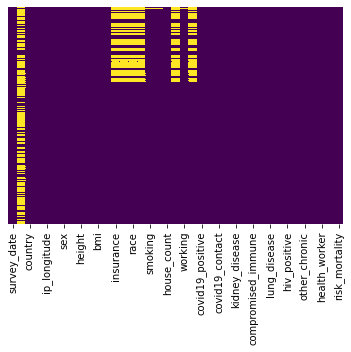

In [ ]:
covid.isnull().sum()
sns.heatmap(covid.isnull(), yticklabels = False, cbar = False, cmap ='viridis')
plt.show()

In [ ]:
for col in covid.columns:
  covid[col].fillna("NA", inplace=True)     

In [ ]:
#Checking if the value is replaced or not
data = covid
data.iloc[70:100, 13:14]

,income
70,NA
71,NA
72,NA
73,NA
74,NA
75,NA
76,NA
77,NA
78,NA
79,gov


In [ ]:
for col in covid.columns:
  covid[col] = covid[col].fillna(value = 'unknown')

In [ ]:
covid.isnull().sum()

survey_date               0
region                    0
country                   0
ip_latitude               0
ip_longitude              0
ip_accuracy               0
sex                       0
age                       0
height                    0
weight                    0
bmi                       0
blood_type                0
insurance                 0
income                    0
race                      0
immigrant                 0
smoking                   0
contacts_count            0
house_count               0
public_transport_count    0
working                   0
worried                   0
covid19_positive          0
covid19_symptoms          0
covid19_contact           0
asthma                    0
kidney_disease            0
liver_disease             0
compromised_immune        0
heart_disease             0
lung_disease              0
diabetes                  0
hiv_positive              0
hypertension              0
other_chronic             0
nursing_home        

In [ ]:
#calculating the average BMI of a patient from the US who is COVID-19 positive
covid[covid['country']=='US']['bmi'].mean()

28.92496226984606

In [ ]:
covid.country.unique()

array(['US', 'NL', 'BR', 'CH', 'ES', 'AU', 'RU', 'JP', 'MT', 'GB', 'NZ',
       'PK', 'CL', 'IE', 'UA', 'CA', 'IN', 'BE', 'BH', 'HU', 'MX', 'GR',
       'IT', 'DE', 'SG', 'HK', 'EG', 'RS', 'PE', 'FR', 'CO', 'PS', 'DO',
       'SE', 'MK', 'PT', 'TH', 'RO', 'PH', 'LT', 'AR', 'DK', 'GE', 'EC',
       'SA', 'PA', 'ZA', 'AM', 'TR', 'BD', 'DZ', 'QA', 'IQ', 'IL', 'ID',
       'AE', 'GT', 'CZ', 'IR', 'KZ', 'BG', 'NO', 'NA', 'AT', 'MD', 'SK',
       'HN', 'ET', 'SV', 'PL', 'MO', 'HR', 'BS', 'CR', 'SI', 'AD', 'LU',
       'BA', 'KR', 'NP', 'MU', 'PR', 'FI', 'MZ', 'VI', 'MY', 'LV', 'AW',
       'MM', 'KY', 'KE'], dtype=object)

In [ ]:
#Checking the higest risk_molarity
covid.groupby('country')['risk_mortality'].mean().sort_values(ascending = False)

country
IT    10.031844
AD     3.994000
PT     3.603583
AM     3.291000
NZ     3.143556
        ...    
MZ     0.073000
QA     0.064000
BH     0.062500
FI     0.056333
KE     0.050000
Name: risk_mortality, Length: 91, dtype: float64

In [ ]:
#Country which is having the highest risk_molarity
covid.groupby('country')['risk_mortality'].mean().sort_values(ascending = False).head(1)

country
IT    10.031844
Name: risk_mortality, dtype: float64

In [ ]:
#Countries atleast reported 10 positive cases
a = covid.groupby('country')['covid19_positive'].sum()
aa = covid.groupby('country')['covid19_positive'].sum()>=10
a.loc[aa]

country
BE      13
BR     154
CA      51
CL      11
ES      10
GB     127
IN      15
IT      32
MX      32
PK      17
US    1222
ZA      17
Name: covid19_positive, dtype: int64

In [ ]:
#Top five countries according to the covid positive cases
a.loc[aa].sort_values(ascending = False).head()

country
US    1222
BR     154
GB     127
CA      51
IT      32
Name: covid19_positive, dtype: int64

###Univariate Analysis


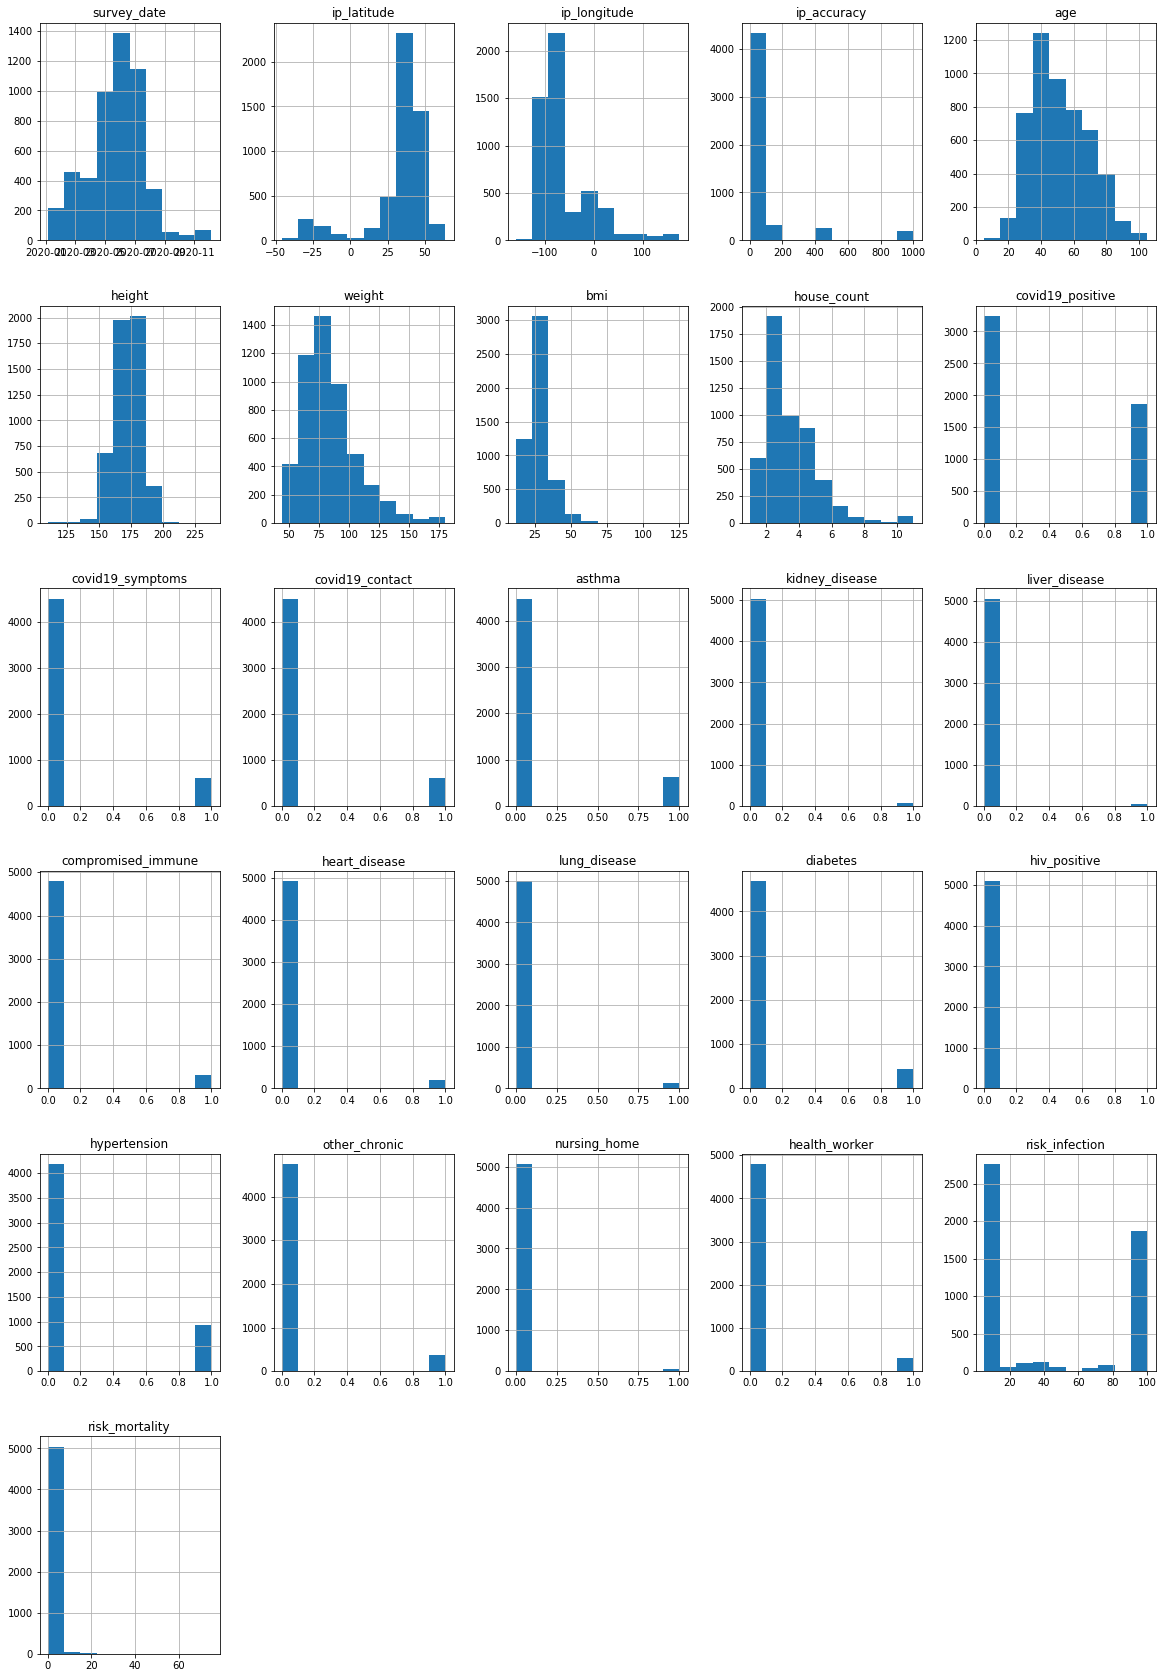

In [ ]:
import matplotlib.pyplot as plt
covid.hist(figsize=[20,30])
plt.show()
# Univaraite analysis is the analysis of every column to get the insight about its data and distribution.


Risk Infection and Risk Mortality are right skewed.

Weight and BMI are right skewed

Height is normally skewed

In [ ]:
df= covid.copy()

In [ ]:
print(f"Risk_Mortality ranges from {df['risk_mortality'].min()} - {df['risk_mortality'].max()}")

Risk_Mortality ranges from 0.05 - 75.0


In [ ]:
print(f"Risk_infection ranges from {df['risk_infection'].min()} - {df['risk_infection'].max()}")

Risk_infection ranges from 5.0 - 100.0


In [ ]:
print(f"Values < 10 = {df[df['risk_mortality']<10]['risk_mortality'].count()}")
print(f"Values > 10 = {df[df['risk_mortality']>10]['risk_mortality'].count()}")

Values < 10 = 5064
Values > 10 = 47


In [ ]:
df[df['risk_mortality']>10]['covid19_positive'].value_counts()

1    39
0     8
Name: covid19_positive, dtype: int64

In [ ]:
df[df['risk_mortality']<10]['covid19_positive'].value_counts()

0    3233
1    1831
Name: covid19_positive, dtype: int64

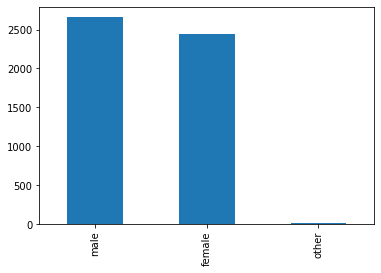

In [ ]:
df['sex'].value_counts().plot.bar()
#There are more male than female

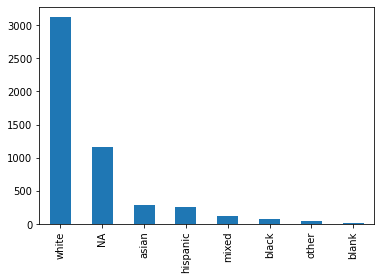

In [ ]:
df['race'].value_counts().plot.bar()
plt.show()
#White dominates the dataset - US based

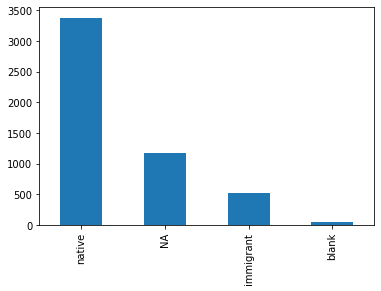

In [ ]:
df['immigrant'].value_counts().plot.bar()
plt.show()

#Majority are native

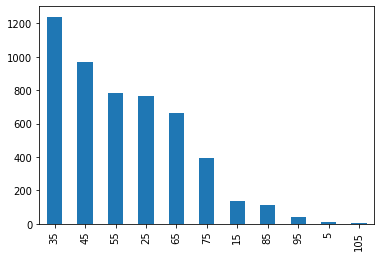

In [ ]:
df['age'].value_counts().plot.bar()
plt.show()

#Age of 35 are the most affected people

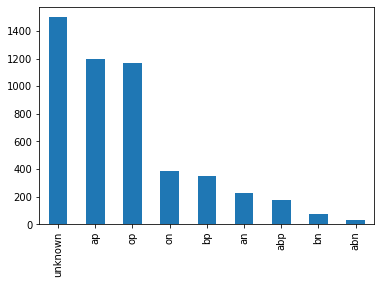

In [ ]:
df['blood_type'].value_counts().plot.bar()
plt.show()

#There is more than 1400 missing data
#A+ and O+ are the blood group maximum people has
#Rest 800 peoples has the blood group O-, B+, AB+

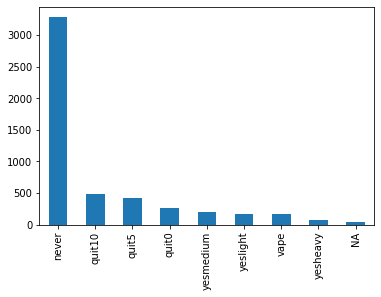

In [ ]:
df['smoking'].value_counts().plot.bar()

#More than 3500 peoples never smoked
#Less than 500 peoples were regular smoker

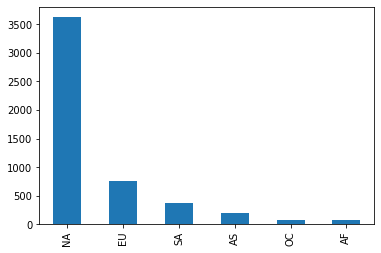

In [ ]:
df['region'].value_counts().plot.bar()

#More than 700 peoples belong to Europe region 

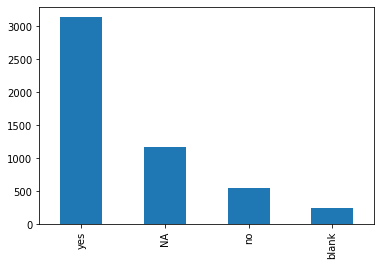

In [ ]:
df['insurance'].value_counts().plot.bar()

#More than 3000 people has insurance

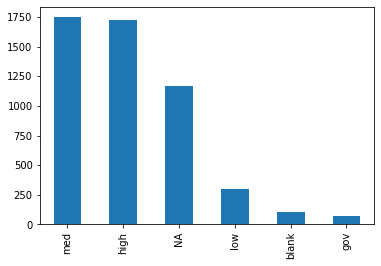

In [ ]:
df['income'].value_counts().plot.bar()
plt.show()

#Around 1750 people has medium salary and same number of people has high salary
#Less than 150 people has government job

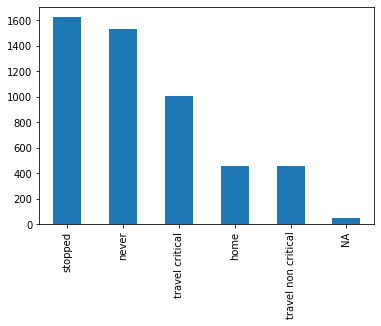

In [ ]:
df['working'].value_counts().plot.bar()
plt.show()

#around 1600 people stopped working
#Around 1500 people never worked

In [ ]:
print(covid.columns)

Index(['survey_date', 'region', 'country', 'ip_latitude', 'ip_longitude',
       'ip_accuracy', 'sex', 'age', 'height', 'weight', 'bmi', 'blood_type',
       'insurance', 'income', 'race', 'immigrant', 'smoking', 'contacts_count',
       'house_count', 'public_transport_count', 'working', 'worried',
       'covid19_positive', 'covid19_symptoms', 'covid19_contact', 'asthma',
       'kidney_disease', 'liver_disease', 'compromised_immune',
       'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive',
       'hypertension', 'other_chronic', 'nursing_home', 'health_worker',
       'risk_infection', 'risk_mortality'],
      dtype='object')


In [ ]:
GroupedByCountry = covid.groupby('country').sum()

In [ ]:
GroupedByCountry = GroupedByCountry.sort_values(by='covid19_positive')
fig = go.Figure(data=[
    go.Bar(name='covid19_positive', x = GroupedByCountry.index, y=GroupedByCountry['covid19_positive'])
])
fig.update_layout(barmode='group', width = 1500, height = 600)
fig.show()
#US has the most covid patient in the world

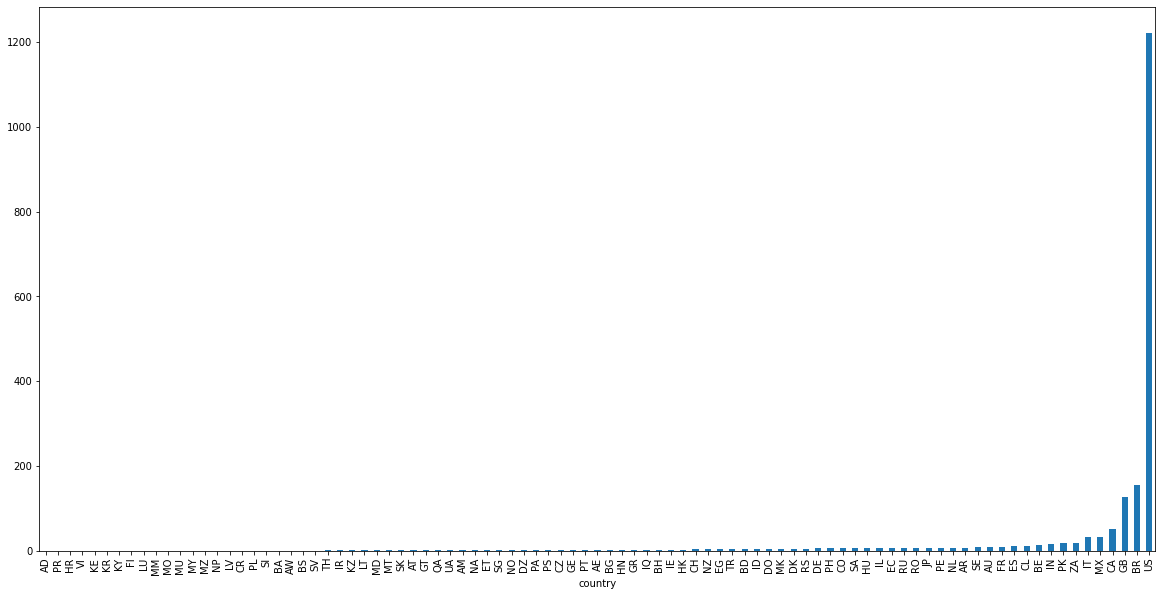

In [ ]:
GroupedByCountry['covid19_positive'].plot.bar(figsize=(20,10))

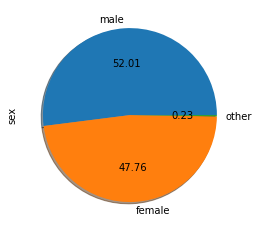

In [ ]:
covid['sex'].value_counts().plot(kind="pie", shadow=True, autopct="%.2f")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



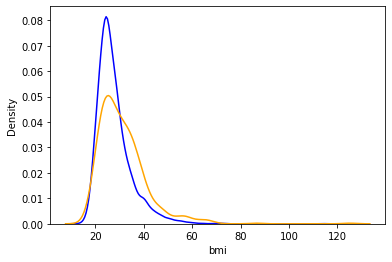

In [ ]:
sns.distplot(covid[covid['covid19_symptoms'] == 0]['bmi'], hist=False, color="blue") 
sns.distplot(covid[covid['covid19_symptoms'] == 1]['bmi'], hist=False, color="orange")
plt.show()

In [ ]:
hasCovid_haveSymptoms= covid[(covid['covid19_positive']==1) & (covid['covid19_symptoms']==1)]

In [ ]:
hasCovid_nothaveSymptoms= covid[(covid['covid19_positive']==1) & (covid['covid19_symptoms']==0)]

In [ ]:
hasCovid_nothaveSymptoms

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,2020-03-25,NA,US,33.9031,-118.1494,500,male,55,184,80,...,0,0,0,0,0,0,0,0,100.0,0.194
1,2020-03-26,EU,NL,52.0218,4.5357,5,female,85,164,84,...,0,0,0,0,1,0,0,0,100.0,3.483
2,2020-03-28,SA,BR,-26.8740,-48.7028,10,female,25,170,64,...,0,0,0,0,0,0,0,0,100.0,0.050
3,2020-03-27,EU,CH,47.1921,8.1766,20,male,95,132,124,...,0,0,0,1,0,0,0,0,100.0,13.973
5,2020-03-31,EU,ES,41.3691,2.1462,20,female,35,162,66,...,0,0,0,0,0,0,0,0,100.0,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,2020-07-07,SA,BR,-22.9799,-43.3934,200,male,75,178,106,...,0,0,0,0,0,0,0,0,100.0,2.513
1866,2020-06-07,NA,MX,20.6439,-103.3565,20,male,25,196,90,...,0,0,0,0,0,0,0,0,100.0,0.079
1867,2020-05-07,NA,US,41.8986,-87.6833,500,male,35,192,84,...,0,0,0,0,0,0,0,0,100.0,0.050
1868,2020-05-07,SA,BR,-22.9467,-47.1292,5,male,35,176,78,...,0,0,0,0,0,0,0,0,100.0,0.050


In [ ]:
covid[(covid['covid19_positive']==0) & (covid['covid19_symptoms']==1)]['sex'].value_counts()

male      25
female    18
Name: sex, dtype: int64

In [ ]:
covid[(covid['country']=='US')|(covid['country']=='IN')]

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,2020-03-25,NA,US,33.9031,-118.1494,500,male,55,184,80,...,0,0,0,0,0,0,0,0,100.0,0.194
4,2020-03-27,NA,US,40.5733,-111.9107,5,male,35,184,118,...,0,0,1,0,1,1,0,0,100.0,0.116
6,2020-01-04,NA,US,39.9857,-75.0585,5,male,45,174,84,...,0,0,0,0,0,0,0,0,100.0,0.748
7,2020-05-04,NA,US,42.3931,-71.2092,5,female,35,160,54,...,0,0,0,0,0,0,0,0,100.0,0.050
8,2020-05-04,NA,US,38.7414,-77.1411,100,male,25,180,84,...,0,0,0,0,0,0,0,0,100.0,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,2020-07-07,NA,US,42.3990,-71.2699,5,female,55,168,76,...,0,0,0,0,0,0,0,0,5.0,0.300
5106,2020-07-07,NA,US,32.2146,-110.7915,5,female,75,166,66,...,0,0,0,0,0,0,0,0,5.0,1.496
5108,2020-08-07,NA,US,30.5336,-97.7256,1,male,75,182,82,...,0,0,0,0,1,0,0,0,5.0,2.171
5109,2020-06-07,NA,US,39.8837,-75.3197,5,male,55,184,80,...,0,0,0,0,0,0,0,0,5.0,0.557


In [ ]:
covid[covid['country'].isin(['US','IN'])]

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,2020-03-25,NA,US,33.9031,-118.1494,500,male,55,184,80,...,0,0,0,0,0,0,0,0,100.0,0.194
4,2020-03-27,NA,US,40.5733,-111.9107,5,male,35,184,118,...,0,0,1,0,1,1,0,0,100.0,0.116
6,2020-01-04,NA,US,39.9857,-75.0585,5,male,45,174,84,...,0,0,0,0,0,0,0,0,100.0,0.748
7,2020-05-04,NA,US,42.3931,-71.2092,5,female,35,160,54,...,0,0,0,0,0,0,0,0,100.0,0.050
8,2020-05-04,NA,US,38.7414,-77.1411,100,male,25,180,84,...,0,0,0,0,0,0,0,0,100.0,0.050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,2020-07-07,NA,US,42.3990,-71.2699,5,female,55,168,76,...,0,0,0,0,0,0,0,0,5.0,0.300
5106,2020-07-07,NA,US,32.2146,-110.7915,5,female,75,166,66,...,0,0,0,0,0,0,0,0,5.0,1.496
5108,2020-08-07,NA,US,30.5336,-97.7256,1,male,75,182,82,...,0,0,0,0,1,0,0,0,5.0,2.171
5109,2020-06-07,NA,US,39.8837,-75.3197,5,male,55,184,80,...,0,0,0,0,0,0,0,0,5.0,0.557


In [ ]:
covid[['covid19_positive','risk_infection']].corr()

,covid19_positive,risk_infection
covid19_positive,1.000000,0.963045
risk_infection,0.963045,1.000000


### Bivariate Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

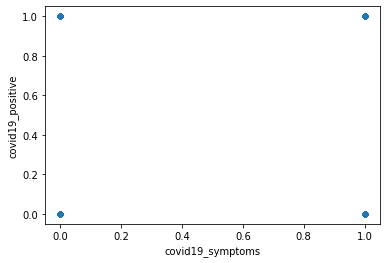

In [ ]:
df.plot.scatter(x='covid19_symptoms', y='covid19_positive')

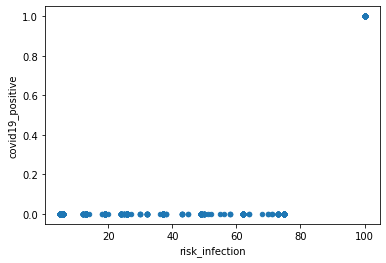

In [ ]:
df.plot.scatter(x='risk_infection', y='covid19_positive')

## Person with risk_mortality has covid postive

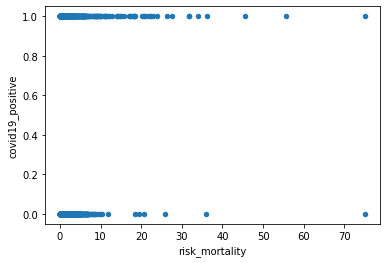

In [ ]:
df.plot.scatter(x='risk_mortality', y='covid19_positive')

#person having risk_mortality less than 45 is likely to be covid19_postive

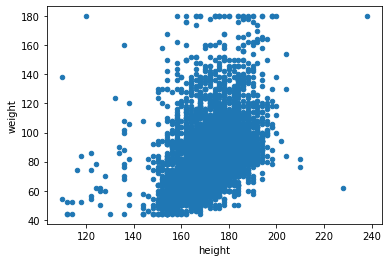

In [ ]:
df.plot.scatter(x='height', y='weight')

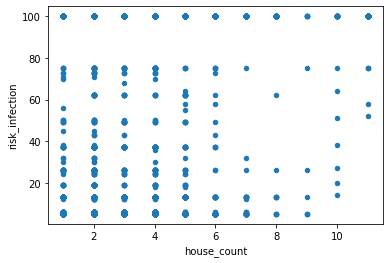

In [ ]:
df.plot.scatter(x='house_count', y='risk_infection')

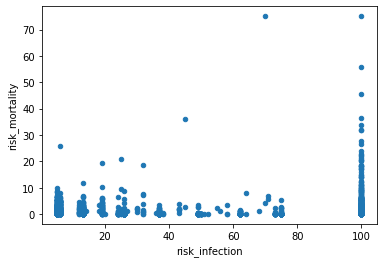

In [ ]:
df.plot.scatter(x='risk_infection', y='risk_mortality')

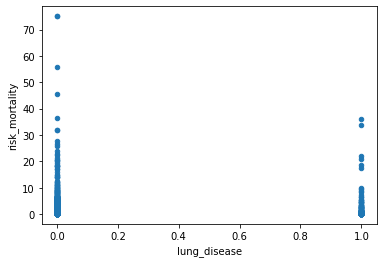

In [ ]:
df.plot.scatter(x='lung_disease', y='risk_mortality')

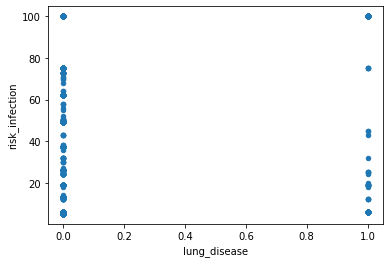

In [ ]:
df.plot.scatter(x='lung_disease', y='risk_infection')

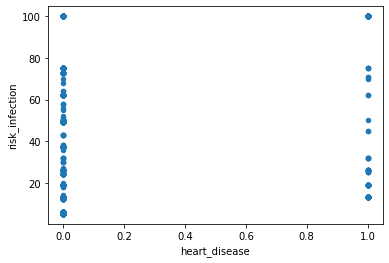

In [ ]:
df.plot.scatter(x='heart_disease', y='risk_infection')

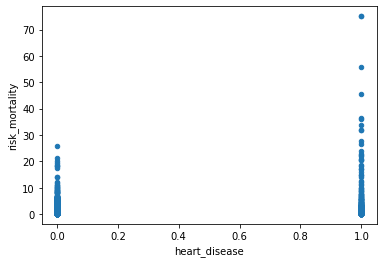

In [ ]:
df.plot.scatter(x='heart_disease', y='risk_mortality')

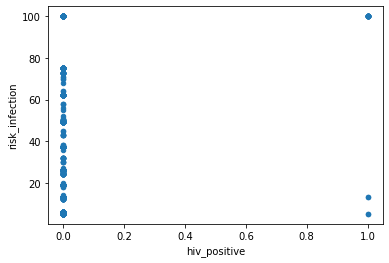

In [ ]:
df.plot.scatter(x='hiv_positive', y='risk_infection')

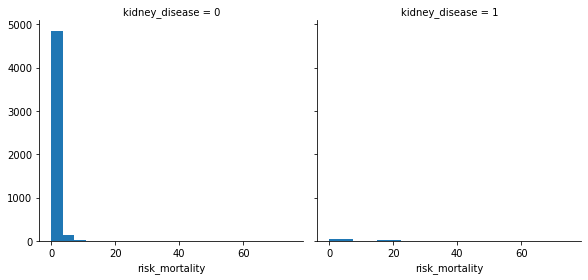

In [ ]:
fn = sns.FacetGrid(df,col='kidney_disease',col_wrap=4,height=4, aspect=1)
fn = fn.map(plt.hist,"risk_mortality")

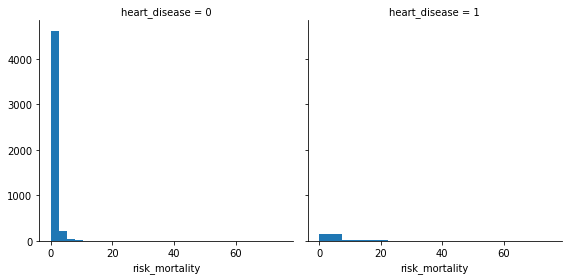

In [ ]:
fn = sns.FacetGrid(df,col='heart_disease',height=4, aspect=1)
fn = fn.map(plt.hist,"risk_mortality")

# Person having heart_disease have lower risk_mortality

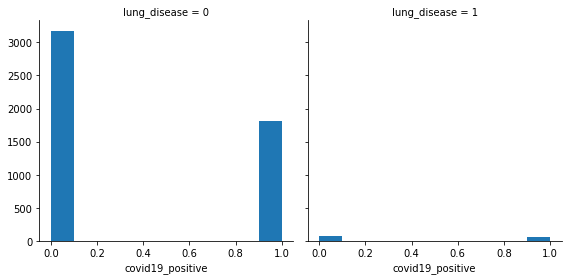

In [ ]:
fn = sns.FacetGrid(df,col='lung_disease',height=4, aspect=1)
fn = fn.map(plt.hist,"covid19_positive")

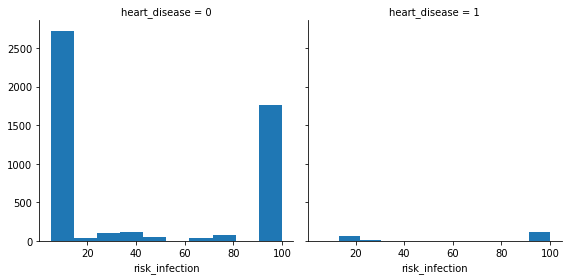

In [ ]:
fn = sns.FacetGrid(df,col='heart_disease',height=4, aspect=1)
fn = fn.map(plt.hist,"risk_infection")

# Persons with heart_disease will have low risk_infection

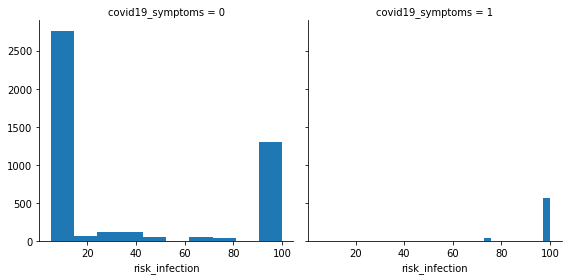

In [ ]:
fn = sns.FacetGrid(df,col='covid19_symptoms',height=4, aspect=1)
fn = fn.map(plt.hist,"risk_infection")

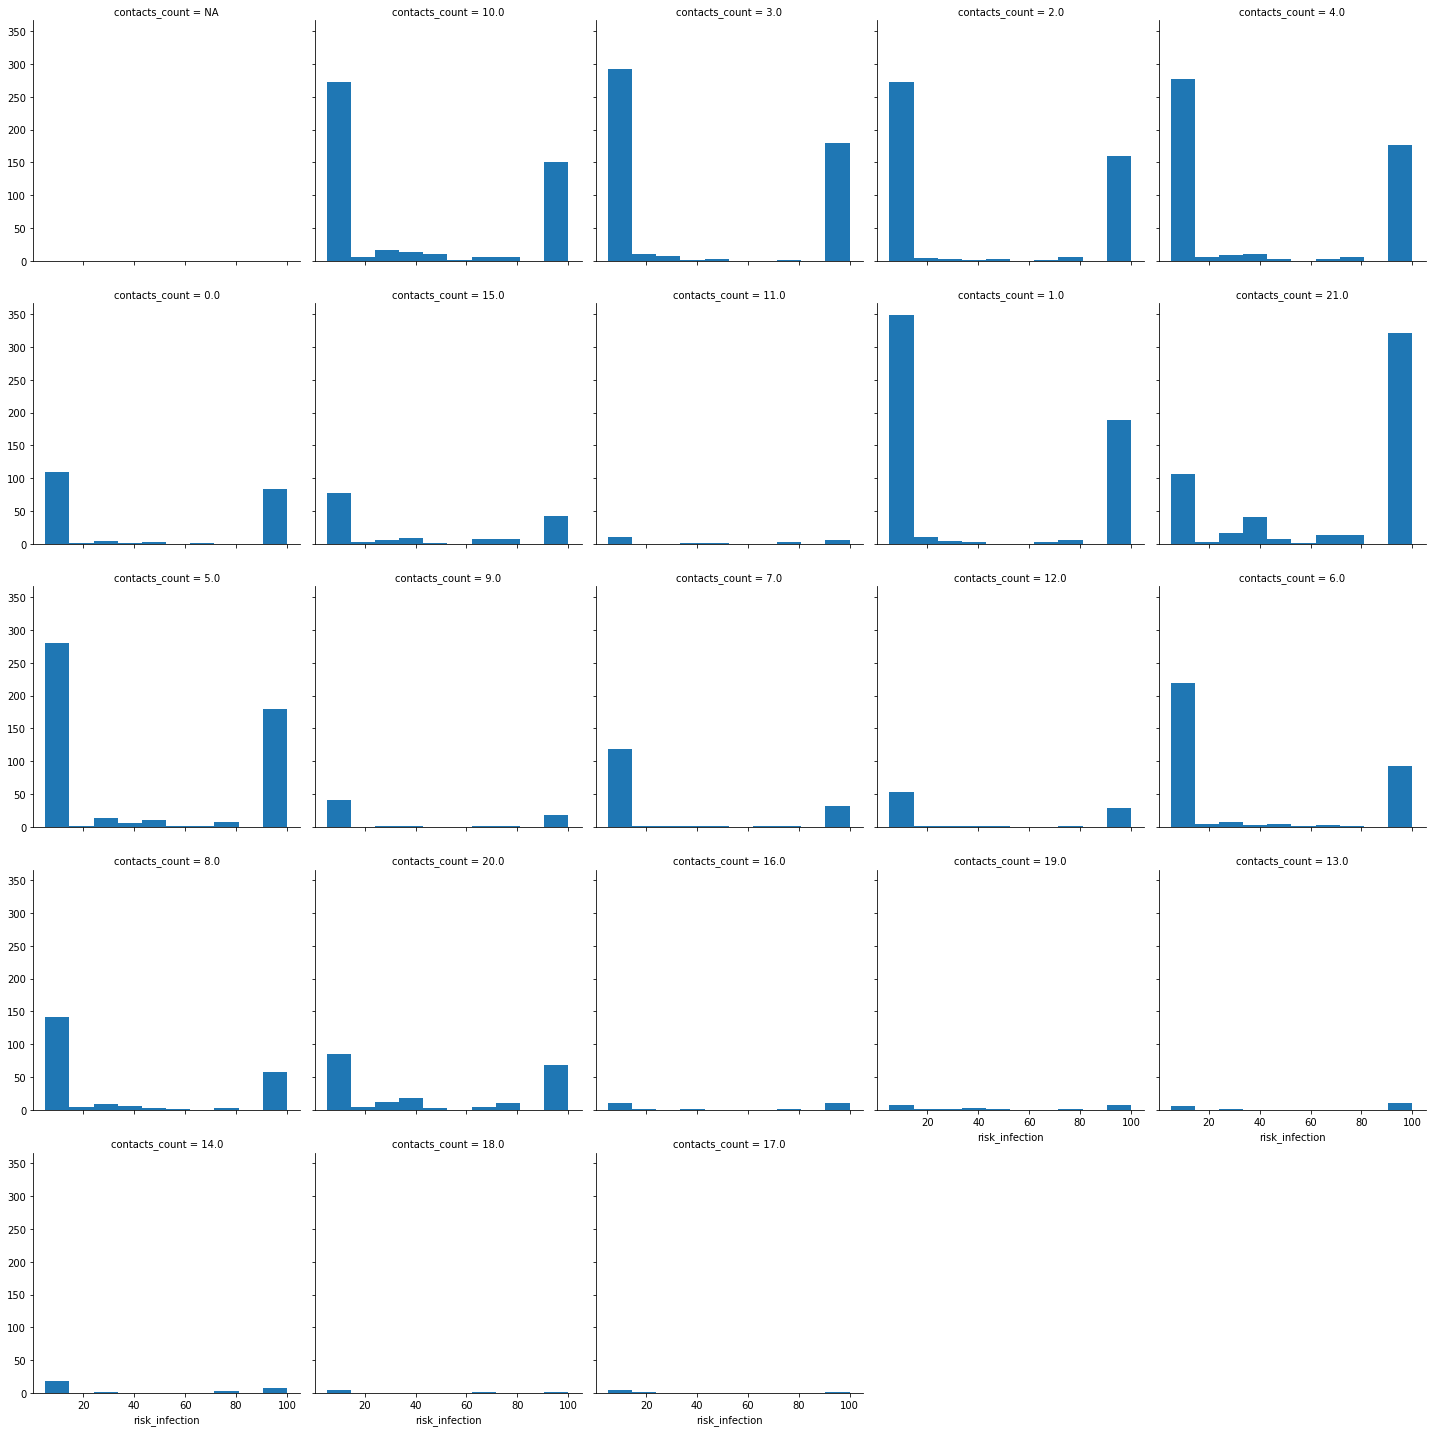

In [ ]:
fn = sns.FacetGrid(df,col='contacts_count',col_wrap=5,height=4, aspect=1)
fn = fn.map(plt.hist,"risk_infection")

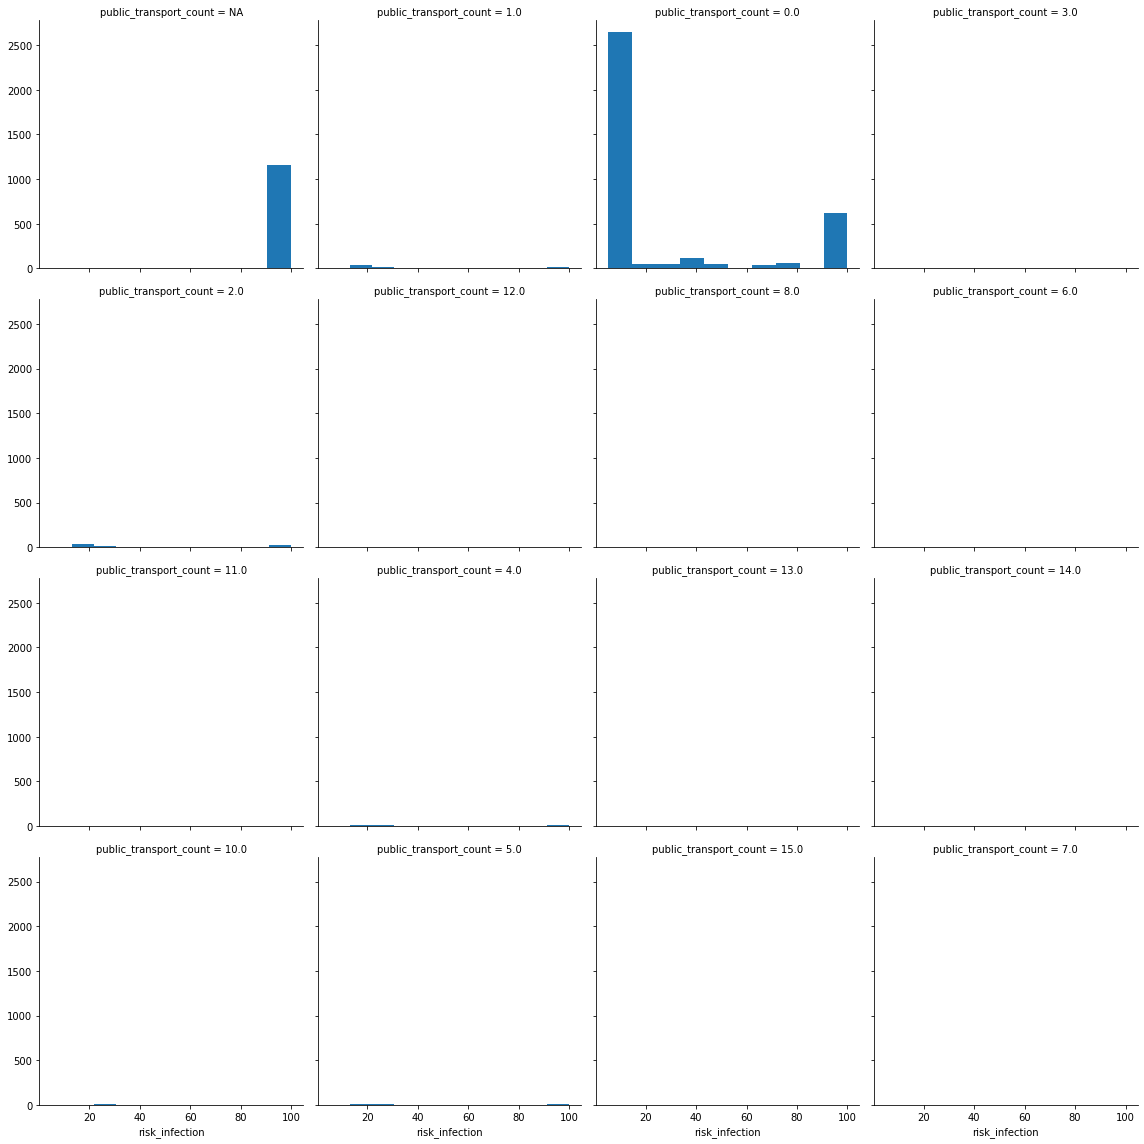

In [ ]:
fn = sns.FacetGrid(df,col='public_transport_count',col_wrap=4,height=4, aspect=1)
fn = fn.map(plt.hist,"risk_infection")

In [ ]:
import plotly.express as px

In [ ]:
cc = df[df['region'] == "EU"].pivot_table(index = "survey_date", values = ["covid19_positive"],
                                                        aggfunc = "sum").reset_index()
fig1 = px.line(cc, x = "survey_date", y = "covid19_positive",
             title = "Covid positive Cases Over Time in EU",
              color_discrete_sequence = ["cyan"])
fig1.show()

In [ ]:
cu = df[df['region'] == "AS"].pivot_table(index = "survey_date", values = ["covid19_positive"],
                                                        aggfunc = "sum").reset_index()
fig1 = px.line(cu, x = "survey_date", y = "covid19_positive",
             title = "Covid positive Cases Over Time in AS",
              color_discrete_sequence = ["cyan"])
fig1.show()

In [ ]:
co = df[df['region'] == "OC"].pivot_table(index = "survey_date", values = ["covid19_positive"],
                                                        aggfunc = "sum").reset_index()
fig1 = px.line(co, x = "survey_date", y = "covid19_positive",
             title = "Covid positive Cases Over Time in OC",
              color_discrete_sequence = ["cyan"])
fig1.show()

In [ ]:
fig = px.scatter(df, x="risk_infection", y="covid19_symptoms", color='covid19_positive')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



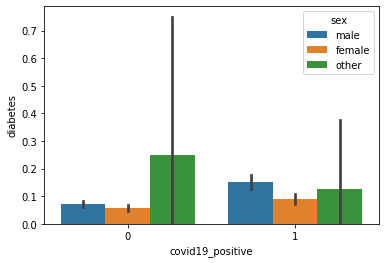

In [ ]:
sns.barplot(df['covid19_positive'],df['diabetes'],hue = df['sex'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



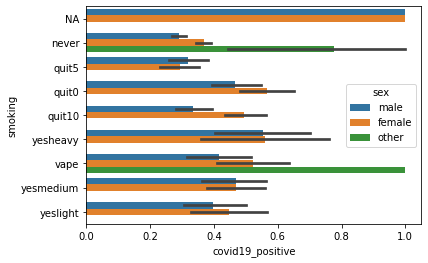

In [ ]:
sns.barplot(df['covid19_positive'],df['smoking'],hue = df['sex'])

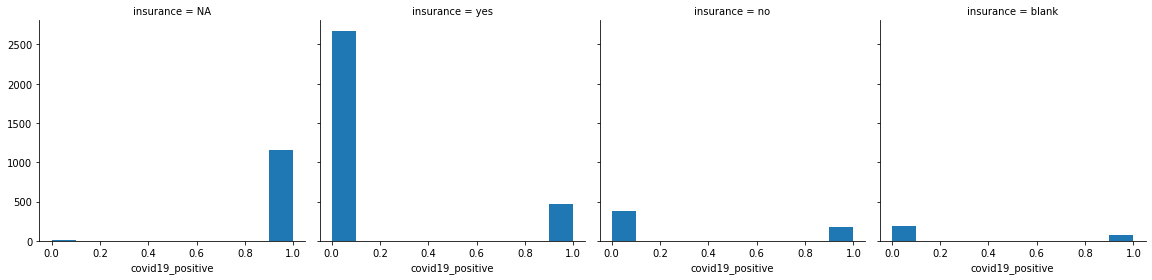

In [ ]:
fn = sns.FacetGrid(df,col='insurance',col_wrap=5,height=4, aspect=1)
fn = fn.map(plt.hist,"covid19_positive")

## PROBLEM

### 1. Identify and report the skewness present in the variables. 

In [ ]:
df.skew().sort_values(ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



hiv_positive          15.508909
risk_mortality        13.180574
nursing_home          10.401023
liver_disease         10.175924
kidney_disease         7.964242
lung_disease           6.159167
heart_disease          4.768362
health_worker          3.653815
compromised_immune     3.605102
other_chronic          3.341092
ip_accuracy            3.157092
diabetes               2.988074
covid19_contact        2.369179
covid19_symptoms       2.354682
asthma                 2.284441
bmi                    2.205616
house_count            1.777352
hypertension           1.652573
ip_longitude           1.652506
weight                 1.203467
covid19_positive       0.557063
age                    0.418113
risk_infection         0.406947
height                -0.444816
ip_latitude           -2.087471
dtype: float64

### 2. There may be inconsistencies or errors in the data. List the errors identified and detail how you have done it. 


There were missing values and the datatype was not relevant 

So we handled the missing values and explicitly changed the datatype

### 3. Answer the followings: 


#### a. What is the average BMI of a patient from the US who is COVID-19 positive? 


In [ ]:
print(f"average BMI of a patient from the US who is COVID-19 positive  = {covid[(covid['country']=='US') & (covid['covid19_positive']==1)]['bmi'].mean()}")

average BMI of a patient from the US who is COVID-19 positive  = 30.89091653027823


#### b.Which country has the highest (average) risk of mortality? 


In [ ]:
GroupedByCountry = covid.groupby('country')

In [ ]:

GroupedByCountry.mean()['risk_mortality'].sort_values(ascending=False)[:1]
#Italy has the highest average risk mortality

country
IT    10.031844
Name: risk_mortality, dtype: float64

#### c. How many countries have reported at least 10 positive cases? 


In [ ]:
PositiveCaseByCountry = GroupedByCountry.sum()['covid19_positive']

In [ ]:
(PositiveCaseByCountry >10).value_counts()

#11 countries have reported at least 10 positive cases

False    80
True     11
Name: covid19_positive, dtype: int64

In [ ]:
(PositiveCaseByCountry >10).sort_values().tail(11).index

#These are the countries which have reported atleast 10 positve cases


Index(['US', 'IT', 'BR', 'CA', 'CL', 'PK', 'MX', 'GB', 'IN', 'BE', 'ZA'], dtype='object', name='country')

#### d.Which are the top-five countries according to the number of positive cases? 


In [ ]:
PositiveCaseByCountry.sort_values(ascending=False)[:5]

#top 5 countries

country
US    1222
BR     154
GB     127
CA      51
MX      32
Name: covid19_positive, dtype: int64

In [ ]:
#Top 5 countries are 
print(f"Top 5 countries according to positive cases are : {list(PositiveCaseByCountry.sort_values(ascending=False)[:5].index)}")

Top 5 countries according to positive cases are : ['US', 'BR', 'GB', 'CA', 'MX']


###4. Using suitable visualisation plots: 


#### 1. Understand the distribution of variables and identify data quality problems. 


In [ ]:
df.plot()

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f66f77927a0> (for post_execute):


ValueError: ignored

ValueError: ignored

#### 2. Determine if there is any relationship between the variables risk_infection and COVID-19 positive? How would you handle these two variables in the data modelling if a relationship exists? 


In [ ]:
covid[['covid19_positive','risk_infection']].corr()
#Correlation simply means a mutual relationship between two or more things.
#yes there is a positive correlation between covid19 positive and risk infection

,covid19_positive,risk_infection
covid19_positive,1.000000,0.963045
risk_infection,0.963045,1.000000


#### 3. Identify the highly correlated variable pairs and elaborate on how to treat these variables in the mining process in such a case. 



In [ ]:
cor_matrix = df.corr().abs()

In [ ]:
cor_matrix

,ip_latitude,ip_longitude,ip_accuracy,age,height,weight,bmi,house_count,covid19_positive,covid19_symptoms,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
ip_latitude,1.000000,0.263630,0.080543,0.061512,0.019461,0.046499,0.037976,0.038184,0.022831,0.001442,...,0.011887,0.012483,0.008862,0.003694,0.002824,0.036744,0.006722,0.057494,0.037082,0.033428
ip_longitude,0.263630,1.000000,0.052510,0.042405,0.003836,0.087234,0.085097,0.092357,0.010806,0.015995,...,0.025702,0.009948,0.012880,0.032108,0.009539,0.015607,0.018805,0.069733,0.007800,0.024630
ip_accuracy,0.080543,0.052510,1.000000,0.041706,0.019257,0.029690,0.024707,0.050889,0.012757,0.013079,...,0.013721,0.003712,0.008187,0.000265,0.010334,0.022140,0.016013,0.037852,0.024803,0.009737
age,0.061512,0.042405,0.041706,1.000000,0.032284,0.029958,0.015916,0.076851,0.107697,0.089273,...,0.221796,0.087177,0.206457,0.010568,0.287128,0.068032,0.159664,0.058515,0.128451,0.472003
height,0.019461,0.003836,0.019257,0.032284,1.000000,0.394877,0.105438,0.058675,0.084425,0.056466,...,0.032676,0.004772,0.000597,0.013982,0.045131,0.071917,0.054709,0.031845,0.081447,0.009675
weight,0.046499,0.087234,0.029690,0.029958,0.394877,1.000000,0.855831,0.026217,0.131520,0.112981,...,0.086984,0.038322,0.197814,0.061919,0.225010,0.003654,0.057386,0.013656,0.133183,0.095924
bmi,0.037976,0.085097,0.024707,0.015916,0.105438,0.855831,1.000000,0.062237,0.181765,0.148756,...,0.068089,0.039297,0.205467,0.075903,0.205143,0.037747,0.041107,0.001238,0.181780,0.099662
house_count,0.038184,0.092357,0.050889,0.076851,0.058675,0.026217,0.062237,1.000000,0.138746,0.106124,...,0.072095,0.037979,0.035978,0.045750,0.000689,0.034822,0.205600,0.011409,0.156842,0.048219
covid19_positive,0.022831,0.010806,0.012757,0.107697,0.084425,0.131520,0.181765,0.138746,1.000000,0.429796,...,0.082294,0.029625,0.093370,0.059161,0.024726,0.087271,0.086751,0.010343,0.963045,0.059613
covid19_symptoms,0.001442,0.015995,0.013079,0.089273,0.056466,0.112981,0.148756,0.106124,0.429796,1.000000,...,0.091626,0.047461,0.094747,0.061429,0.037009,0.091333,0.003378,0.016729,0.450598,0.033312


In [ ]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(); print(to_drop)

#Dropping column which has correaltion greater than .95


['risk_infection']


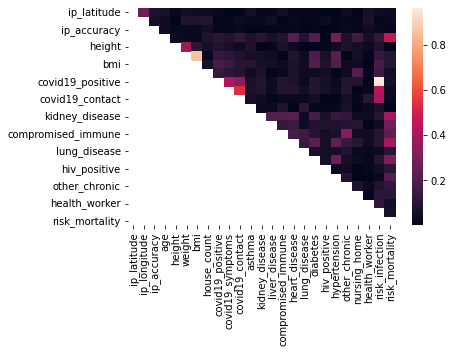

In [ ]:
import seaborn as sns
sns.heatmap(upper_tri)

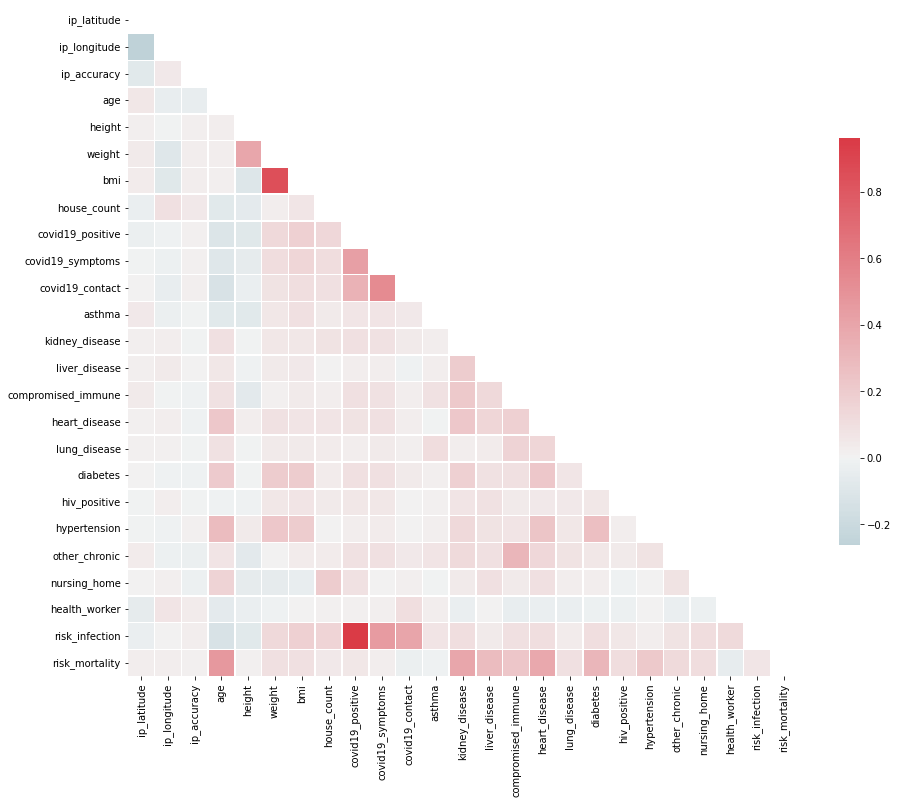

In [ ]:
mask = np.zeros_like(df.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
svm = sns.heatmap(df.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
figure = svm.get_figure()

####  4. Summarize your findings based on data exploration and elaborate on what kind of data preparation is essential. Will you correct any data type assigned for a variable in this dataset after a systematic data exploration? 


DataType for datetime was fixed in survey_date. Rest all the data was okay. 
Traditionally the continous columns should be converted to numeric datatype  

In [ ]:
cols=list(covid.columns)
continous=list(covid._get_numeric_data().columns)
print("Columns : ",cols)
print("Continous Variables   : ",continous)
categorical=list(set(cols)-set(continous))
print("Categorical Variables : ",categorical)

Columns :  ['survey_date', 'region', 'country', 'ip_latitude', 'ip_longitude', 'ip_accuracy', 'sex', 'age', 'height', 'weight', 'bmi', 'blood_type', 'insurance', 'income', 'race', 'immigrant', 'smoking', 'contacts_count', 'house_count', 'public_transport_count', 'working', 'worried', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease', 'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive', 'hypertension', 'other_chronic', 'nursing_home', 'health_worker', 'risk_infection', 'risk_mortality']
Continous Variables   :  ['ip_latitude', 'ip_longitude', 'ip_accuracy', 'age', 'height', 'weight', 'bmi', 'house_count', 'covid19_positive', 'covid19_symptoms', 'covid19_contact', 'asthma', 'kidney_disease', 'liver_disease', 'compromised_immune', 'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive', 'hypertension', 'other_chronic', 'nursing_home', 'health_worker', 'risk_infection', 'risk_mortality']
Categorical Vari


#### 5. Selection of data mining task and feature selection: 



#### 1. Identify the most suitable data mining task (i.e. classification, clustering or association mining) that can be performed on this dataset. Justify your choice. 


Classification can be performed on the dataset. We can build pattern based on the data and a classification model can classfiy the `covid19_positive` column.

So all the other columns can be the **input columns** and `covid19_positive` will be the **target column**.

#### 2. What variables will you include in this data mining task and why? Describe here if you will create any derived variables. Identify the roles (input, target) of each variable. 

In [ ]:
covid.columns

Index(['survey_date', 'region', 'country', 'ip_latitude', 'ip_longitude',
       'ip_accuracy', 'sex', 'age', 'height', 'weight', 'bmi', 'blood_type',
       'insurance', 'income', 'race', 'immigrant', 'smoking', 'contacts_count',
       'house_count', 'public_transport_count', 'working', 'worried',
       'covid19_positive', 'covid19_symptoms', 'covid19_contact', 'asthma',
       'kidney_disease', 'liver_disease', 'compromised_immune',
       'heart_disease', 'lung_disease', 'diabetes', 'hiv_positive',
       'hypertension', 'other_chronic', 'nursing_home', 'health_worker',
       'risk_infection', 'risk_mortality'],
      dtype='object')

`'region', 'country', 'sex', 'age', 'bmi', 'blood_type','insurance', 'smoking', 'contacts_count','house_count', 'public_transport_count', 'covid19_symptoms', 'covid19_contact', 'asthma','kidney_disease', 'liver_disease', 'compromised_immune','heart_disease', 'lung_disease', 'diabetes', 'hiv_positive','hypertension', 'other_chronic', 'health_worker','risk_infection', 'risk_mortality'` could be considered as input variables


AND

`covid19_postive` shoule be target variable


### 6. Data preparation for mining 




####1. Apply normalization for the variables that need it. Justify your choice. You must apply both min-max and z-score normalization and explain in detail which one is best. 


`height, weight, bmi` were chosen to be scaled because they are quantative, rest other like `person_count, risk_mortality` etc are factual and statstical so they were not normalised

In [ ]:
df_min_max = df.copy()
to_be_normalised = ['height','weight','bmi']
for column in to_be_normalised:
	df_min_max[column] = (df_min_max[column] - df_min_max[column].min()) / (df_min_max[column].max() - df_min_max[column].min())	

In [ ]:
df_min_max

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,2020-03-25,NA,US,33.9031,-118.1494,500,male,55,0.578125,0.264706,...,0,0,0,0,0,0,0,0,100.0,0.194
1,2020-03-26,EU,NL,52.0218,4.5357,5,female,85,0.421875,0.294118,...,0,0,0,0,1,0,0,0,100.0,3.483
2,2020-03-28,SA,BR,-26.8740,-48.7028,10,female,25,0.468750,0.147059,...,0,0,0,0,0,0,0,0,100.0,0.050
3,2020-03-27,EU,CH,47.1921,8.1766,20,male,95,0.171875,0.588235,...,0,0,0,1,0,0,0,0,100.0,13.973
4,2020-03-27,NA,US,40.5733,-111.9107,5,male,35,0.578125,0.544118,...,0,0,1,0,1,1,0,0,100.0,0.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,2020-07-07,NA,US,32.2146,-110.7915,5,female,75,0.437500,0.161765,...,0,0,0,0,0,0,0,0,5.0,1.496
5107,2020-07-07,NA,CA,43.5832,-79.3910,1,male,75,0.453125,0.191176,...,0,0,0,0,0,0,0,0,5.0,3.510
5108,2020-08-07,NA,US,30.5336,-97.7256,1,male,75,0.562500,0.279412,...,0,0,0,0,1,0,0,0,5.0,2.171
5109,2020-06-07,NA,US,39.8837,-75.3197,5,male,55,0.578125,0.264706,...,0,0,0,0,0,0,0,0,5.0,0.557


In [ ]:
df_z = df.copy()
for column in to_be_normalised:
	df_z[column] = (df_z[column] - df_z[column].mean()) / df_z[column].std()	

In [ ]:
df_z

,survey_date,region,country,ip_latitude,ip_longitude,ip_accuracy,sex,age,height,weight,...,heart_disease,lung_disease,diabetes,hiv_positive,hypertension,other_chronic,nursing_home,health_worker,risk_infection,risk_mortality
0,2020-03-25,NA,US,33.9031,-118.1494,500,male,55,1.099988,-0.162826,...,0,0,0,0,0,0,0,0,100.0,0.194
1,2020-03-26,EU,NL,52.0218,4.5357,5,female,85,-0.720443,0.009884,...,0,0,0,0,1,0,0,0,100.0,3.483
2,2020-03-28,SA,BR,-26.8740,-48.7028,10,female,25,-0.174314,-0.853668,...,0,0,0,0,0,0,0,0,100.0,0.050
3,2020-03-27,EU,CH,47.1921,8.1766,20,male,95,-3.633133,1.736988,...,0,0,0,1,0,0,0,0,100.0,13.973
4,2020-03-27,NA,US,40.5733,-111.9107,5,male,35,1.099988,1.477922,...,0,0,1,0,1,1,0,0,100.0,0.116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5106,2020-07-07,NA,US,32.2146,-110.7915,5,female,75,-0.538400,-0.767313,...,0,0,0,0,0,0,0,0,5.0,1.496
5107,2020-07-07,NA,CA,43.5832,-79.3910,1,male,75,-0.356357,-0.594602,...,0,0,0,0,0,0,0,0,5.0,3.510
5108,2020-08-07,NA,US,30.5336,-97.7256,1,male,75,0.917945,-0.076471,...,0,0,0,0,1,0,0,0,5.0,2.171
5109,2020-06-07,NA,US,39.8837,-75.3197,5,male,55,1.099988,-0.162826,...,0,0,0,0,0,0,0,0,5.0,0.557


Although z-score is more statical and handles outliers but does not produce normalized data with the exact same scale hence min-max scaling was prefered 

####2. Correct all the data quality problems identified in Task 4. 


In [ ]:
df['survey_date'] = pd.to_datetime(df['survey_date'])
df['age'] = df.age.apply(lambda x : int(np.mean([int(i) for i in x.split("_")])))
df['height'] = pd.to_numeric(df['height'])

#### 3. Finally, split the data for the future data mining task. Justify your choice of the data partition. 

Data is partitioned into 80% training data and 20% testing data. For this `train_test_split` function of `sklearn's` `model_selection` was used

In [ ]:
from sklearn.model_selection import train_test_split

y = df_min_max['covid19_positive'].copy()
df_min_max.drop(columns='covid19_positive',inplace=True)

In [ ]:
print(df['covid19_positive'].value_counts())
lbl_1,lbl_0 = df['covid19_positive'].value_counts()
print(f"Label No class : {round((lbl_1*100)/df['covid19_positive'].count(),2)} %")
print(f"Label Yes class : {round((lbl_0*100)/df['covid19_positive'].count(),2)} %")


0    3241
1    1870
Name: covid19_positive, dtype: int64
Label No class : 63.41 %
Label Yes class : 36.59 %


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_min_max, y, test_size=0.2, random_state=42)

In [ ]:
print("After Splitting the data into training and testing sets : ")
print("\nTraining Data\n")
print(y_train.value_counts())
lbl_1,lbl_0 = y_train.value_counts()
print(f"Label No class : {round((lbl_1*100)/y_train.count(),2)} %")
print(f"Label Yes class : {round((lbl_0*100)/y_train.count(),2)} %")
print("\nTesting Data\n")
print(y_test.value_counts())
lbl_1,lbl_0 = y_test.value_counts()
print(f"Label No class : {round((lbl_1*100)/y_test.count(),2)} %")
print(f"Label Yes class : {round((lbl_0*100)/y_test.count(),2)} %")

After Splitting the data into training and testing sets : 

Training Data

0    2606
1    1482
Name: covid19_positive, dtype: int64
Label No class : 63.75 %
Label Yes class : 36.25 %

Testing Data

0    635
1    388
Name: covid19_positive, dtype: int64
Label No class : 62.07 %
Label Yes class : 37.93 %
